<a href="https://colab.research.google.com/github/andieg05/worksheet-1/blob/main/Week%201/worksheet2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/edavishahl/ENGR240/blob/main/Class%20Demos%20and%20Activities/Week%201/worksheet2_template.ipynb)

# Worksheet 1.2: Electrical Signal Analysis

## ENGR& 240: Engineering Computations
### Introduction to Scientific Computing with Python

## Objectives
- Apply array operations to analyze signal properties
- Identify key characteristics (maxima, minima, thresholds) in signal data
- Calculate derived metrics from signal data
- Use boolean indexing to find specific signal conditions

## Introduction

Engineers frequently work with electrical signals and need to analyze their properties. In this worksheet, we will explore how Python can be used to analyze common electrical waveforms. We'll focus on sine waves and square waves, which are fundamental in electrical engineering.

For these exercises, we'll need the NumPy and Matplotlib libraries:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set plot style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Task 1: Signal Generation and Visualization

First, let's generate our test signals. We'll create a sine wave and a square wave to work with during our analysis tasks. This code has been provided for you.

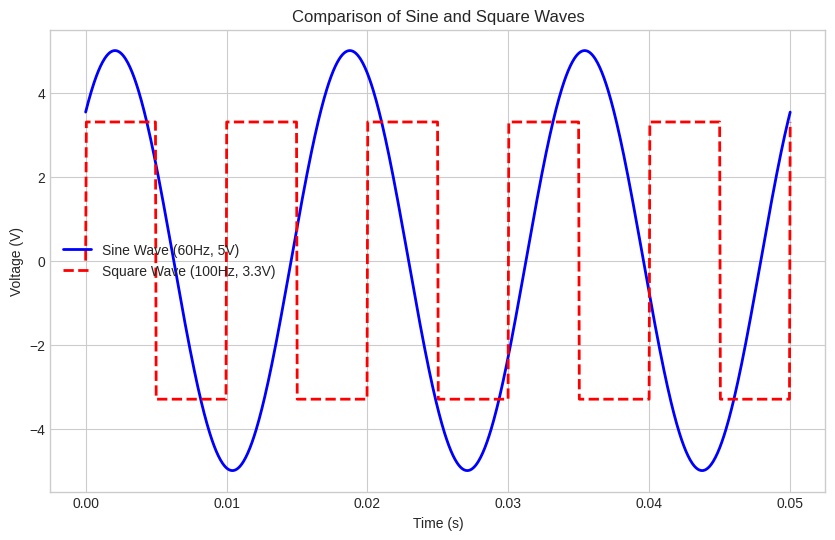

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set plot style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Define signal parameters
amplitude = 5.0     # Amplitude in volts
frequency = 60.0    # Frequency in Hz
phase = np.pi/4     # Phase shift in radians

# Create time vector from 0 to 50ms with 1000 points
t = np.linspace(0, 0.05, 1000)  # 0 to 50ms with 1000 points

# Generate sine wave: v(t) = A sin(2πft + φ)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase)

# Define square wave parameters
square_amplitude = 3.3    # Amplitude in volts
square_frequency = 100.0  # Frequency in Hz

# Generate square wave using np.sign() function
sine_basis = np.sin(2 * np.pi * square_frequency * t)
square_wave = square_amplitude * np.sign(sine_basis)

# Plot both signals on the same graph
plt.figure()
plt.plot(t, sine_wave, 'b-', linewidth=2, label='Sine Wave (60Hz, 5V)')
plt.plot(t, square_wave, 'r--', linewidth=2, label='Square Wave (100Hz, 3.3V)')

# Add title, labels, and legend
plt.title('Comparison of Sine and Square Waves')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

## Task 2: Signal Analysis Techniques

Now that we've created our signals, let's analyze their properties using NumPy array operations.

### Task 2.1: Finding Signal Peaks

For a sine wave, the peak values (maxima and minima) are important characteristics. Let's find the peaks in our sine wave and highlight them on a plot.

Complete the code below to find the maximum and minimum values in the sine wave, and then plot the sine wave with the peaks marked by distinct points.

Maximum voltage: 5.00V at t = 0.002102s
Minimum voltage: -5.00V at t = 0.010410s


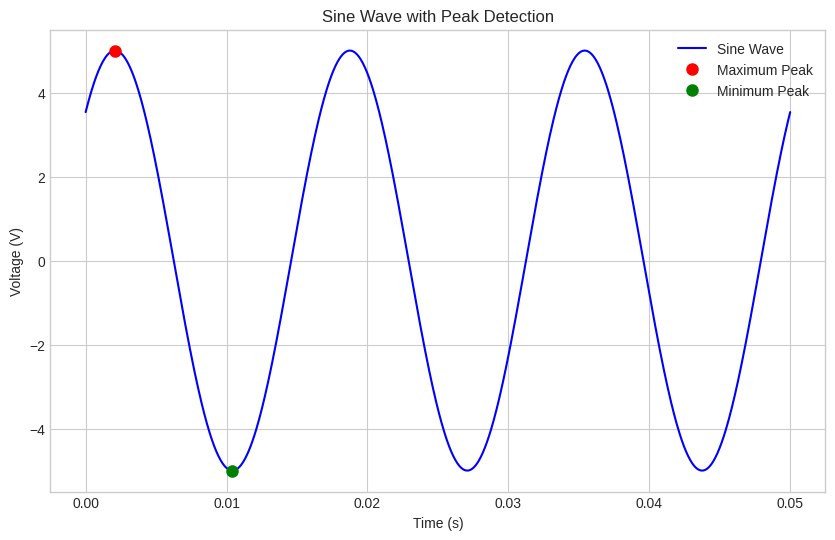

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define signal parameters
amplitude = 5.0     # Amplitude in volts
frequency = 60.0    # Frequency in Hz
phase = np.pi/4     # Phase shift in radians

# Create time vector from 0 to 50ms with 1000 points
t = np.linspace(0, 0.05, 1000)  # 0 to 50ms with 1000 points

# Generate sine wave: v(t) = A sin(2πft + φ)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase)

# Find the maximum value and its index
max_value = np.max(sine_wave)
max_index = np.argmax(sine_wave)
max_time = t[max_index]

# Find the minimum value and its index
min_value = np.min(sine_wave)
min_index = np.argmin(sine_wave)
min_time = t[min_index]

print(f"Maximum voltage: {max_value:.2f}V at t = {max_time:.6f}s")
print(f"Minimum voltage: {min_value:.2f}V at t = {min_time:.6f}s")

# Plot the sine wave with peaks marked
plt.figure()
plt.plot(t, sine_wave, 'b-', label='Sine Wave')

# Mark the maximum with a red point
plt.plot(max_time, max_value, 'ro', markersize=8, label='Maximum Peak')

# Mark the minimum with a green point
plt.plot(min_time, min_value, 'go', markersize=8, label='Minimum Peak')

# Add title, labels, and legend
plt.title('Sine Wave with Peak Detection')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

### Task 2.2: Calculating Derived Metrics

Engineers often need to calculate derived metrics from signals, such as:

- RMS (Root Mean Square) value
- Average value
- Peak-to-peak value

The RMS value of a signal is defined as:

$$V_{RMS} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}v_i^2}$$

Where $v_i$ represents each voltage sample and $N$ is the total number of samples.

Complete the code below to calculate these metrics for both the sine and square waves.

In [7]:
# Calculate metrics for sine wave
sine_rms = np.sqrt(np.mean(sine_wave**2))
sine_avg = np.average(sine_wave)
sine_p2p = np.max(sine_wave) - np.min(sine_wave)

# Calculate metrics for square wave
square_rms = np.sqrt(np.mean(square_wave**2))
square_avg = np.average(square_wave)
square_p2p = np.max(square_wave) - np.min(square_wave)

# Display results in a formatted way
print("Sine Wave Metrics:")
print(f"  RMS Value: {sine_rms:.4f}V")
print(f"  Average Value: {sine_avg:.4f}V")
print(f"  Peak-to-Peak Value: {sine_p2p:.4f}V")
print("\nSquare Wave Metrics:")
print(f"  RMS Value: {square_rms:.4f}V")
print(f"  Average Value: {square_avg:.4f}V")
print(f"  Peak-to-Peak Value: {square_p2p:.4f}V")

Sine Wave Metrics:
  RMS Value: 3.5355V
  Average Value: 0.0035V
  Peak-to-Peak Value: 9.9999V

Square Wave Metrics:
  RMS Value: 3.2983V
  Average Value: 0.0033V
  Peak-to-Peak Value: 6.6000V


### Task 2.3: Threshold Crossing Analysis

In digital systems, we often need to determine when a signal crosses a particular threshold voltage. For this task:

1. Determine all points where the sine wave crosses a threshold of 2.5V (rising edge only)
2. Plot the sine wave and mark these threshold crossing points

This task introduces boolean indexing/masking, which is a powerful feature in NumPy for data analysis.

In [8]:
# Define threshold
threshold = 2.5  # Volts

# Find rising edge crossings
# We want indices where: current value > threshold AND previous value <= threshold
# Hint: You'll need to use boolean arrays and indexing
rising_indices = # Your code here

# Get the times and values at these threshold crossings
crossing_times = # Your code here
crossing_values = # Your code here

print(f"Found {len(crossing_times)} threshold crossings at:")
for i, time in enumerate(crossing_times):
    print(f"  Crossing {i+1}: t = {time:.6f}s, V = {crossing_values[i]:.4f}V")

# Plot the sine wave with threshold and crossing points
plt.figure()
plt.plot(t, sine_wave, 'b-', label='Sine Wave')

# Add horizontal line for threshold
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold}V)')

# Mark the crossing points
# Your code here

# Add title, labels, and legend
plt.title('Sine Wave Threshold Crossing Analysis')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (ipython-input-1903119855.py, line 7)

## Reflection

After completing this worksheet, answer the following questions:

1. How do the RMS values of the sine and square waves compare? Can you explain why they differ?

2. What NumPy functions did you find most useful for signal analysis? Why?

3. How could these signal analysis techniques be applied to real-world engineering problems?

4. What was the most challenging part of this worksheet? How did you overcome it?